<a href="https://colab.research.google.com/github/buvir/Image-Edge-Detection-Contour-Extraction-Tool/blob/main/edge_detection_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Edge Detection & Contour Extraction Tool
# Colab-friendly version

import cv2
import matplotlib.pyplot as plt
from google.colab import files
import os

In [2]:
# Create assets folder to save output
os.makedirs("assets", exist_ok=True)

Saving image-removebg-preview__49_60214b0a-c01a-4f85-9e5e-15e09ec1bf3b_400x.webp to image-removebg-preview__49_60214b0a-c01a-4f85-9e5e-15e09ec1bf3b_400x.webp


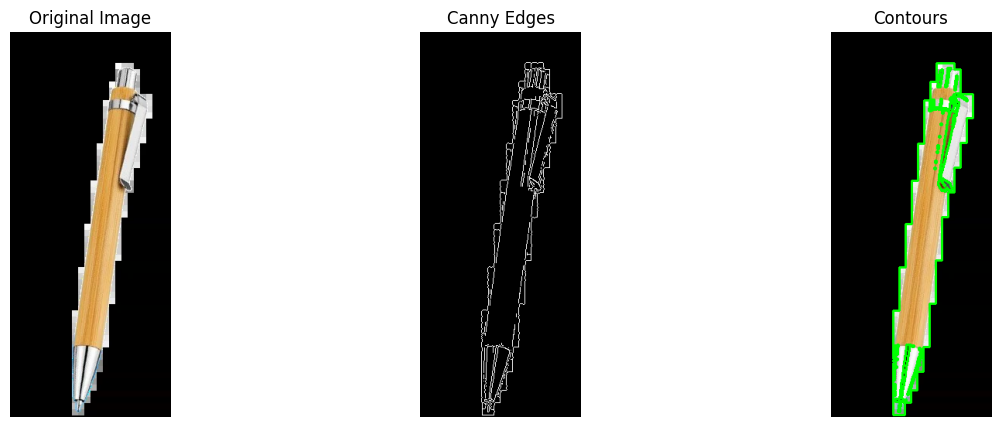

Edges saved to assets/edges_image-removebg-preview__49_60214b0a-c01a-4f85-9e5e-15e09ec1bf3b_400x.webp.png
Contours saved to assets/contours_image-removebg-preview__49_60214b0a-c01a-4f85-9e5e-15e09ec1bf3b_400x.webp.png


In [3]:

# Upload image
uploaded = files.upload()  # Will prompt you to upload image(s)
for filename in uploaded.keys():
    image_path = filename
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Thresholding
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Canny edge detection
    edges = cv2.Canny(gray, 100, 200)

    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contour_image = image.copy()
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

    # Plot original, edges, and contours
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edges")
    plt.axis("off")
    edge_output = f"assets/edges_{filename}.png"
    cv2.imwrite(edge_output, edges)

    plt.subplot(1,3,3)
    plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
    plt.title("Contours")
    plt.axis("off")
    contour_output = f"assets/contours_{filename}.png"
    cv2.imwrite(contour_output, contour_image)

    plt.show()
    print(f"Edges saved to {edge_output}")
    print(f"Contours saved to {contour_output}")